In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tarfile
import librosa
import librosa.display
import pickle

tar = tarfile.open(name = "mini-genres.tar.bz", mode = 'r', fileobj = None, bufsize = 10240)
tar.extractall()
paths = [path for path in tar.getnames() if os.path.splitext(path)[1] == ".au"]
hop_length = 512
n_fft = 2084

In [2]:
# esta função pode ser utilizada com um for, para todos os arquivos do dataframe, cada iteração retorna um
# dicionário, no caso das figuras, foram escritas funções para exibir as variáveis retornadas, os arrays
# ficam armazenados em variáveis 

# esta função retorna apenas variáveis, para exibir os plots, existem outras funções que trabalham em cima
# das variáveis obtidas através desta
def audio_feature_extraction(sample, hop_length, n_fft): 
    
    audio, sr = librosa.load(sample, sr = 44100, duration = 10)
           
    stft = librosa.stft(audio, n_fft = n_fft, hop_length = hop_length)
    spectro = np.abs(stft)
    
    frequencia_db = librosa.amplitude_to_db(spectro)
    mfccs = librosa.feature.mfcc(audio, sr, n_mfcc = 13)
    chromograma = librosa.feature.chroma_stft(audio, sr = sr, n_fft = n_fft, hop_length = hop_length)
    spectral_centroid = librosa.feature.spectral_centroid(audio, sr, n_fft = n_fft, hop_length = hop_length)[0]
    spectral_rolloff = librosa.feature.spectral_rolloff(audio, sr = sr, n_fft = n_fft,
                                                        hop_length = hop_length)[0]
    spectral_bandwidth = librosa.feature.spectral_bandwidth(audio, sr = sr, n_fft = n_fft,
                                                            hop_length = hop_length)[0]
    zero_crossings = librosa.zero_crossings(audio[0:100])
    
    # este 'label' funciona para o formato dos 'paths' dos dados disponíveis para este projeto
    return {'sr':sr, 'log_scale' : frequencia_db, 'mel_scale' : mfccs, 'chromo' : chromograma,
            'centroid' : spectral_centroid, 'rolloff' : spectral_rolloff, 'bandwidth' : spectral_bandwidth,
            'zero' : zero_crossings, 'label': sample.split('/')[1]}

# funções pra display das variáveis referentes aos plots
def display_chromo(chromograma, hop_length):
    librosa.display.specshow(chromograma, x_axis = 'tempo', y_axis = 'chroma',  hop_length = hop_length)
    plt.colorbar()
    plt.show()
    
def display_mfccs(mfccs, sr):
    librosa.display.specshow(mfccs, sr = sr, x_axis = 'tempo')
    plt.colorbar()
    plt.show()
    
def display_log_scale(frequencia_db, sr, hop_length):
    librosa.display.specshow(frequencia_db, sr = sr, hop_length = hop_length)
    plt.xlabel('Tempo (s)')
    plt.ylabel('Frequência (Hz)')
    plt.colorbar()
    plt.title('Espectrograma')
    plt.set_cmap('inferno')
    plt.show()    

# esta função faz o 'unpacking' do dicionário, também exibe os plots, caso " 'show' == True "
def show_all(d, hop_length, show = True):
    arrs1 = d['centroid'], d['rolloff'], d['bandwidth'], d['zero'], d['label']
    arrs2 = d['chromo'], d['mel_scale'], d['log_scale'], d['centroid'], d['rolloff'], d['bandwidth'], \
                                                                           d['zero'], d['label'], d['sr']
    if show == True:
        display_chromo(d['chromo'], hop_length = hop_length)
        display_mfccs(d['mel_scale'], d['sr'])
        display_log_scale(d['log_scale'], d['sr'], hop_length = hop_length)
        return arrs1
    else:
        return arrs2

In [3]:
# criando dicionário contendo extrações de múltiplos áudios 

# passando o dataframe inteiro por este 'for', 'example_dict' seria preenchido com um dicionário para cada
# áudio, cada um destes dicionários possuiria como 'key', o nome do mesmo, em string, as 'keys' destes 
# dicionários que constituiriam 'example_dict', seriam strings explicando cada um de seus valores, estes que
# são as features que desejamos extrair ou variáveis que, se passadas por funções de 'display', exibem os 
# plots exigidos

audio_features = {i : audio_feature_extraction(i, hop_length, n_fft) for i in paths}
pickle.dump(audio_features, open('audio_features.pkl', 'wb'))

# neste ponto, as informçãos já foram todas extraídas, daqui para frente, há diferentes formas de 
# filtrar e exibir as mesmas

In [4]:
# 'audio_features' contém as 'features' de todos os áudios (50)
audio_features = pickle.load(open('audio_features.pkl', 'rb'))
files = [key for key in audio_features.keys()]

In [5]:
# 'audio_features' é um dicionário, cada 'key' deste é o 'path' de um áudio, seu 'valor' é um dicionário,
# organizado desta forma:

# exemplo:
audio_features[files[0]].keys()

dict_keys(['sr', 'log_scale', 'mel_scale', 'chromo', 'centroid', 'rolloff', 'bandwidth', 'zero', 'label'])

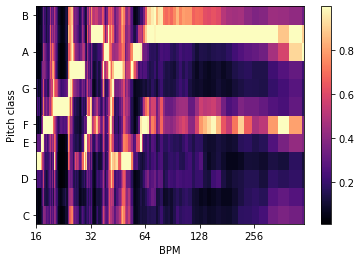

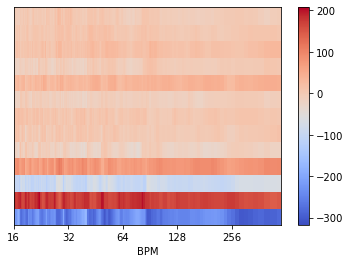

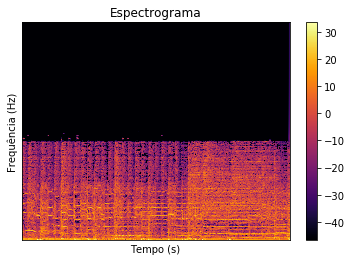

In [6]:
# exemplo 1:

# exibição de imagens
# as variáveis que sofrem 'unpacking' contém os arrays
centroid, rolloff, bandwidth, zero, label = show_all(audio_features[files[0]], hop_length, True)

In [7]:
print(centroid)
print(rolloff)
print(bandwidth)
print(zero)
print(label)

# aqui foi feita a demonstração de como extrair todas as features de um áudio 

[3286.42269921 3306.95283333 3273.91782944 3332.1164832  3342.00631127
 3319.0212934  3336.34263291 3189.01153769 3180.2018921  3115.89521089
 3167.15125461 3235.935861   3083.63878572 2914.91395429 2822.61708226
 2728.41729575 2768.0674791  2578.50615117 2474.06492322 2619.68654501
 2750.40306904 2995.33370963 3110.6697108  3188.63830727 3309.97559142
 3417.86677769 3464.38973182 3401.50952118 3383.69647613 3360.9390476
 3318.88988846 3280.26878769 3255.18245403 3204.27917957 3261.87754099
 3095.13214182 3101.72090152 3057.43443171 3107.90677333 2992.85217464
 2973.11869019 3197.45704249 3314.79886382 3275.4670982  3374.64625863
 3307.67110075 2991.47690913 3013.55170657 3037.31761821 3063.07594795
 2988.99422786 2499.87927637 2073.59968981 2234.40114249 2239.81508436
 2165.35598724 2193.54567111 2078.78924729 2033.37195386 2232.89971747
 2643.88480427 2549.73931808 2163.22702418 2532.32857172 2890.57720079
 2922.99343202 3107.66093562 3184.22928462 3141.002078   3040.54976413
 3031.2

In [8]:
# exemplo 2:

# podemos 'acessar' features de múltiplos áudios de uma vez:
n = 0
for file in files:
    exec(f"chromo{n}, mel_scale{n}, log_scale{n}, centroid{n}, rolloff{n}, bandwidth{n}, zero{n},\
    label{n}, sr{n} = show_all(audio_features[file], hop_length, False)")
    n += 1
    
# obtivemos as variáveis referentes aos 50 áudios (pelo unpacking das mesmas, usando como base, o
# dicionário 'audio_features')

metal


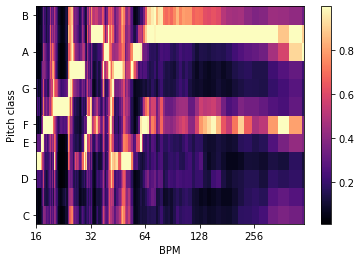

metal


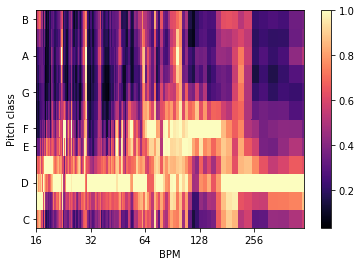

metal


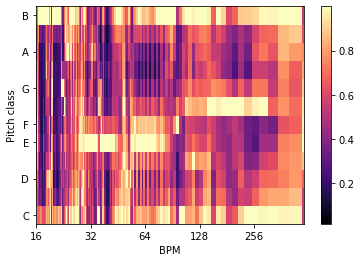

metal


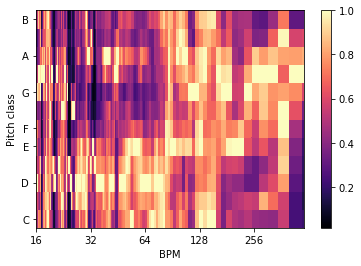

metal


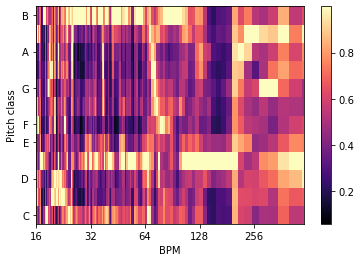

metal


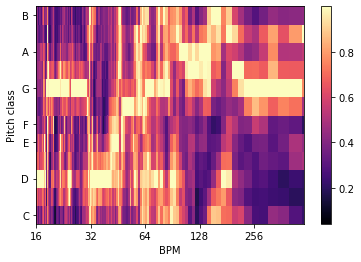

metal


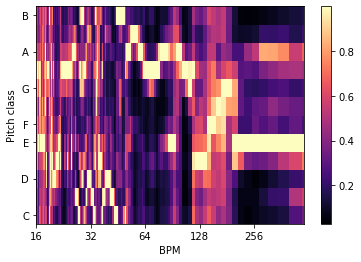

metal


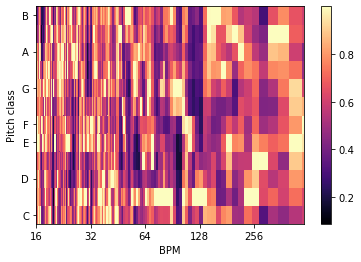

metal


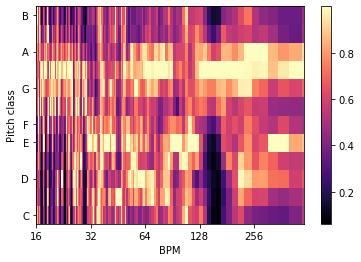

metal


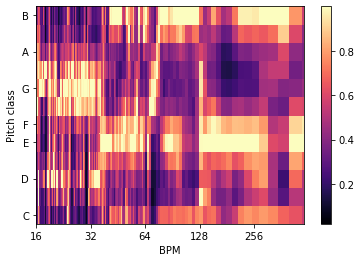

In [9]:
# exibindo chromogramas dos 10 primeiros áudios
for n in range(10):
    exec(f'print(label{n})')
    exec(f'display_chromo(chromo{n}, hop_length)')

jazz


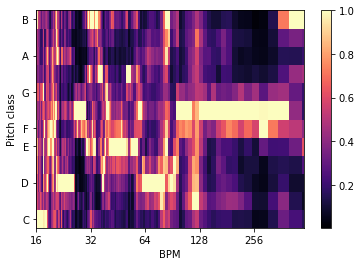

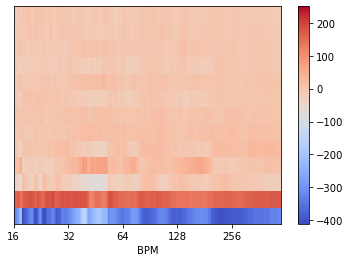

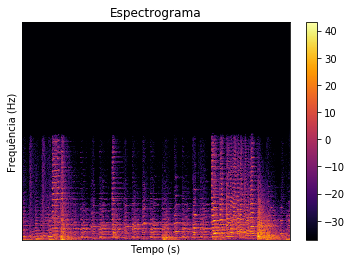

jazz


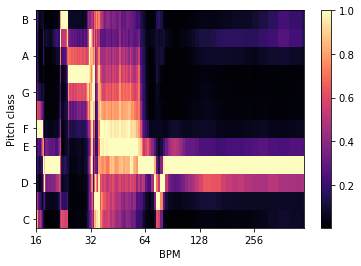

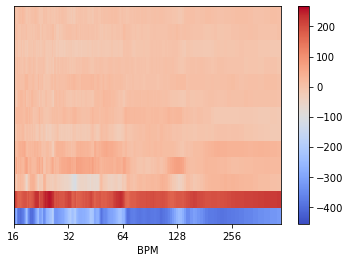

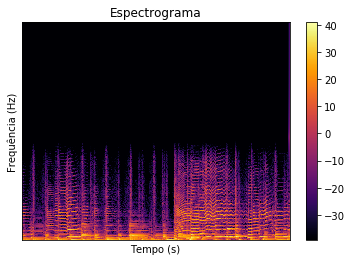

jazz


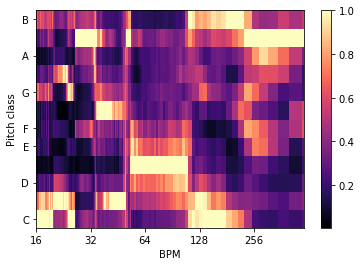

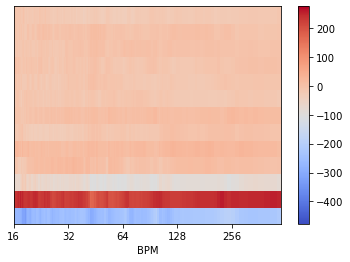

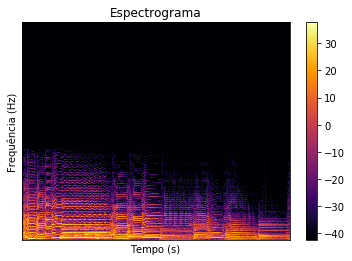

In [10]:
# exibindo os 3 espectrogramas para os 3 últimos áudios
for n in range(47, 50):
    exec(f'print(label{n})')
    exec(f'display_chromo(chromo{n}, hop_length)')
    exec(f'display_mfccs(mel_scale{n}, sr{n})')
    exec(f'display_log_scale(log_scale{n}, sr{n}, hop_length)')

In [1]:
# as variáveis referentes a todos os áudios já existem na memória, pela forma como 'automatizei a extração'
# do dicionário 'audio_features', as variáveis foram declaradas da seguinte maneira:

# n -> (0~49)
# chromo{n}, mel_scale{n}, log_scale{n}, centroid{n}, rolloff{n}, bandwidth{n}, zero{n}, label{n}, sr{n}

# para visualizar as figuras, usamos as funções 'display_chromo()', 'display_mfccs()', 'display_log_scale()',
# para acessar os arrays, basta utilizar os nomes das variáveis acima, para obter todas as 'features' de um 
# áudio em específico, podemos também acessar 'audio_features' diretamente, pela 'key' em string, que será
# o 'path' do áudio, este processo retornará um dicionário contendo as 'features' do áudio, passando estas
# na função 'show_all()', e 'setando' o parâmetro 'show' para 'True', são exibidas as 3 figuras para aquele
# áudio, a função também retorna os arrays correspondentes as demais 'features'

In [11]:
# na função 'audio_feature_extraction', é feito um 'strip' na 'string' contendo o 'path' do áudio, 
# assim, obtemos um 'label' para cada áudio

# podemos agrupar áudios pelo gênero musical, utilizando o dicionário 'audio_features'
genres = pd.Series([audio_features[key]['label'] for key in audio_features.keys()]).unique().tolist()
genres

['metal', 'classical', 'pop', 'rock', 'jazz']

In [12]:
# acessando 'audio_features', filtrando áudios por gênero

genre = 'jazz'
key_list = [key for key in audio_features.keys() if audio_features[key]['label'] == genre]

# obtendo variáveis com as informações de áudios cujo 'label' é 'genre' 
n = 0
for key in key_list:
    exec(f"chromo{n}, mel_scale{n}, log_scale{n}, centroid{n}, rolloff{n}, bandwidth{n}, zero{n}, label{n}, \
    sr{n} = show_all(audio_features['{key}'], hop_length, False)")
    n += 1

# em um primeiro momento, as variáveis são todas 'arrays'

jazz


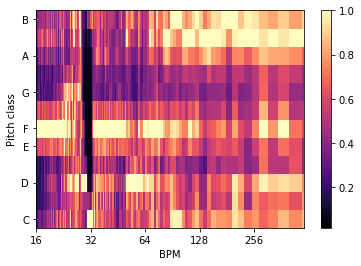

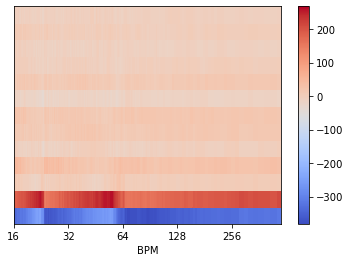

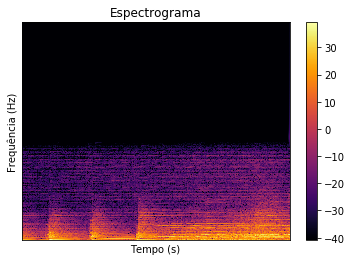

jazz


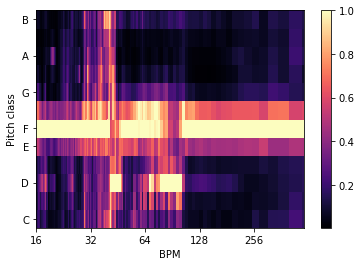

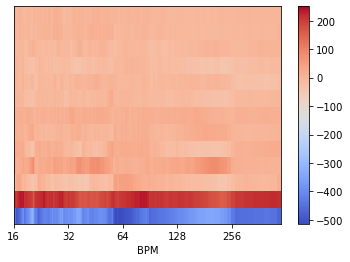

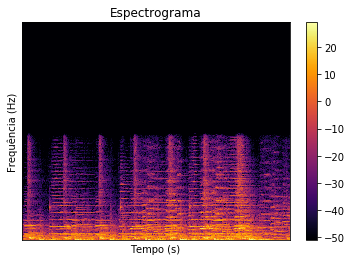

jazz


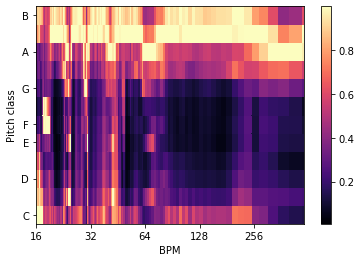

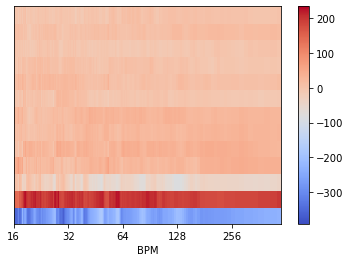

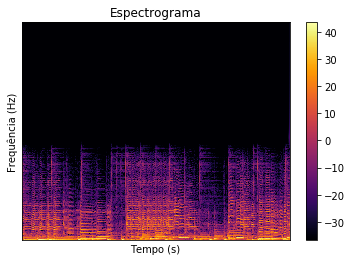

jazz


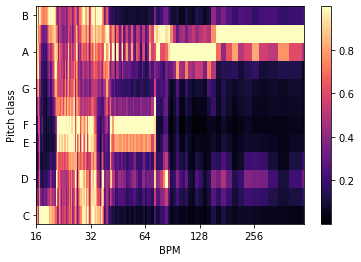

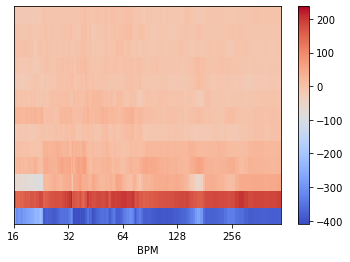

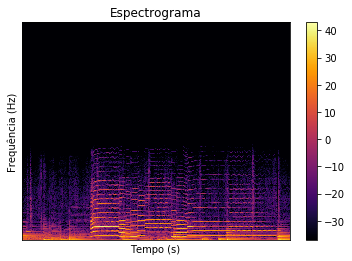

jazz


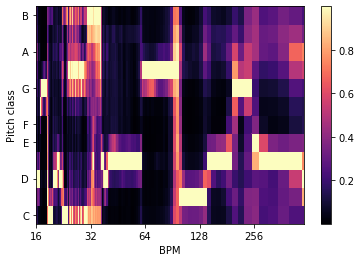

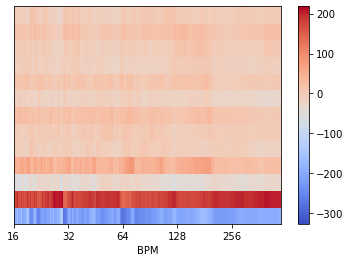

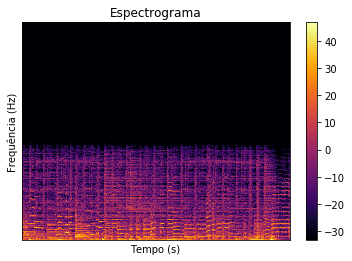

jazz


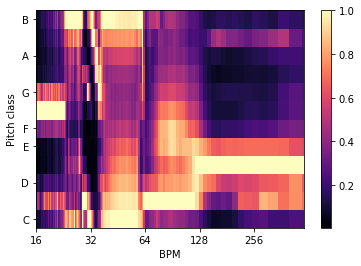

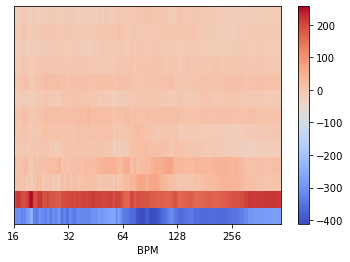

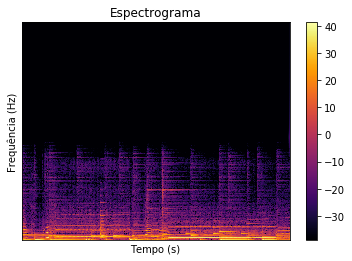

jazz


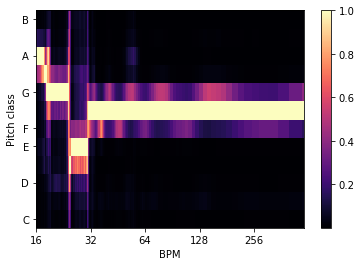

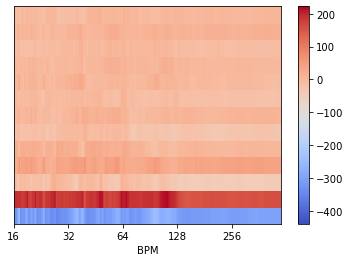

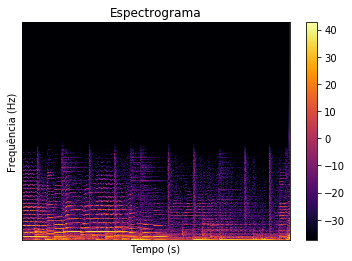

jazz


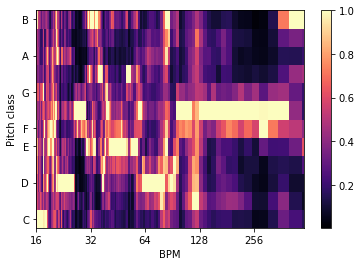

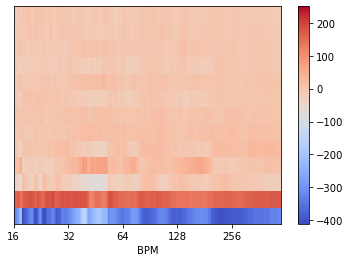

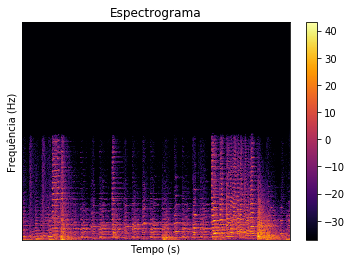

jazz


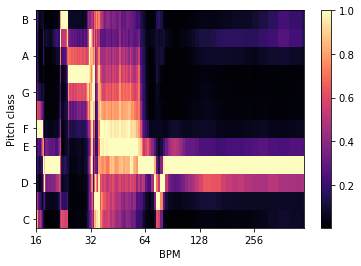

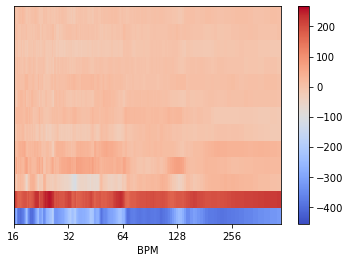

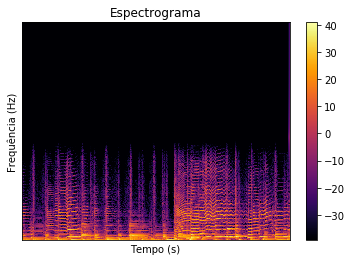

jazz


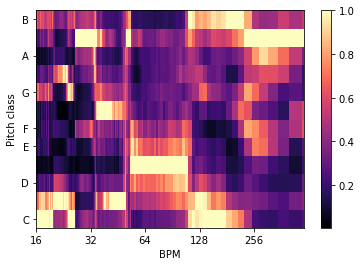

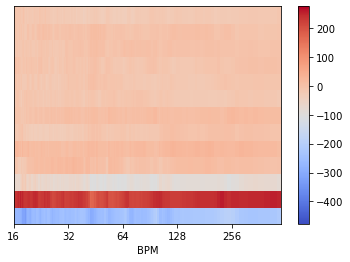

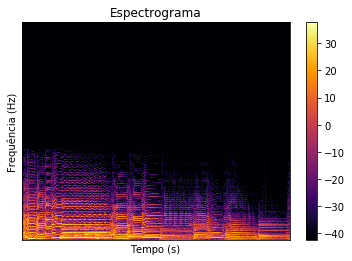

In [14]:
# aqui exibimos algumas delas como imagens, as demais são agrupadas em um dicionário, mas foram delcaradas acima
d = {}
for n in range(len(key_list)):
    exec(f'print(label{n})')
    exec(f'display_chromo(chromo{n}, hop_length)')
    exec(f'display_mfccs(mel_scale{n}, sr{n})')
    exec(f'display_log_scale(log_scale{n}, sr{n}, hop_length)')
    for i in ['centroid', 'rolloff', 'bandwidth', 'zero']:
        var_name = str(i) + str(n)
        exec(f"d['{var_name}'] = {var_name}") 

In [15]:
# dicionário contendo as variáveis referentes aos arrays que representam as 'features' de cada áudio que 
# possuía 'label' = 'genre'
d.keys()

dict_keys(['centroid0', 'rolloff0', 'bandwidth0', 'zero0', 'centroid1', 'rolloff1', 'bandwidth1', 'zero1', 'centroid2', 'rolloff2', 'bandwidth2', 'zero2', 'centroid3', 'rolloff3', 'bandwidth3', 'zero3', 'centroid4', 'rolloff4', 'bandwidth4', 'zero4', 'centroid5', 'rolloff5', 'bandwidth5', 'zero5', 'centroid6', 'rolloff6', 'bandwidth6', 'zero6', 'centroid7', 'rolloff7', 'bandwidth7', 'zero7', 'centroid8', 'rolloff8', 'bandwidth8', 'zero8', 'centroid9', 'rolloff9', 'bandwidth9', 'zero9'])

In [16]:
# acessando 'spectral_centroid' do primeiro áudio que continha 'label' = genre
d['centroid0']

array([1235.33267696, 1043.62719177,  909.37264324,  909.52079677,
        908.0596966 ,  938.95991548,  919.1615423 ,  907.36677324,
        896.46927962,  902.81880857,  878.45229401,  912.44691398,
        909.52388091,  933.87405022,  914.09996388,  950.21102252,
        966.59102555,  922.81690016,  903.56613403,  957.86374279,
        995.5806926 , 1054.06979867, 1053.11590768, 1079.23601358,
       1059.31077181, 1086.06711138, 1138.7181425 , 1167.24920253,
       1114.58874722, 1081.40172564, 1058.48251664, 1076.96315312,
       1154.811582  , 1202.07462397, 1177.1618068 , 1135.22025555,
       1044.26424774, 1185.68019029, 1247.74045855, 1260.1929445 ,
       1303.33574964, 1246.15319534, 1209.57682045, 1226.42786897,
       1226.53033548, 1229.44195187, 1282.40513552, 1344.1771303 ,
       1365.23449553, 1386.85665569, 1462.72600557, 1392.936772  ,
       1461.42038196, 1486.74698643, 1588.85298212, 1590.72093108,
       1641.74685048, 1512.32831085, 1445.66900808, 1561.63777